# 数理最適化

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 線形計画問題

Minimize $\boldsymbol{c^Tx}$\
Subject to $\boldsymbol{Gx} \leq \boldsymbol{h} \quad \boldsymbol{Ax}=\boldsymbol{b}$

Maximize $3x+4y$\
Minimize $-3x-4y$

Subject to\
$$
    x + 4y <= 1700\\
    2x + 3y <= 1400\\
    2x + y <= 1000\\
    x >= 0\\
    y >= 0
$$

In [2]:
from scipy import optimize

In [3]:
c = np.array([-3, -4], dtype=np.float64)
G = np.array([ [1, 4], [2, 3], [2, 1] ], dtype=np.float64)
h = np.array( [1700, 1400, 1000], dtype=np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


## 二次計画法

Minimize $\frac{1}{2}\boldsymbol{x^TPx}+\boldsymbol{q^Tx}$\
Subject to $\boldsymbol{Gx} \leq \boldsymbol{h} \quad \boldsymbol{Ax}=\boldsymbol{b}$

### 式04-07

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$

In [4]:
import cvxopt

In [5]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(sol["x"])
print(sol["primal objective"])

[ 1.57e-16]
[-2.00e+00]

-4.0


### 式04-08

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$\
Subject to $x + y = 0$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$
$$
    \left(
        \begin{matrix}
            1 & 1\\
        \end{matrix}
    \right)   
    \left(
        \begin{matrix}
            x\\
            y\\
        \end{matrix}
    \right)
    = 0    
$$

In [6]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))
A = cvxopt.matrix(np.array([ [1, 1] ],  dtype=np.float64))
b = cvxopt.matrix(np.array([0],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(sol["x"])
print(sol["primal objective"])

[ 1.00e+00]
[-1.00e+00]

-1.0000000000000013


### 式04-09

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$\
Subject to $2x + 3y \leq 3$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$
$$
    \left(
        \begin{matrix}
            2 & 3\\
        \end{matrix}
    \right)   
    \left(
        \begin{matrix}
            x\\
            y\\
        \end{matrix}
    \right)
    \leq 3    
$$

In [7]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))
G = cvxopt.matrix(np.array([ [2, 3] ],  dtype=np.float64))
h = cvxopt.matrix(np.array([3],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(sol["x"])
print(sol["primal objective"])

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[-2.46e-09]
[-2.00e+00]

-4.0


## 勾配降下法

Minimize $f(x,y) = 5x^2 - 6xy + 3y^2 + 6x - 6y$

$$
    \nabla{f}= \left(
        \begin{matrix}
            \frac{\partial f}{\partial x}\\
            \frac{\partial f}{\partial y}\\
        \end{matrix}
    \right) =
    \left(
        \begin{matrix}
            10x - 6y + 6\\
            -6x + 6y - 6\\
        \end{matrix}
    \right)
$$

In [8]:
from solver import GradientDescent

In [9]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

def df(xx):
    x = xx[0]
    y = xx[1]
    df_x = 10*x -6*y +6
    df_y = -6*x +6*y -6
    return np.array([df_x, df_y])

In [10]:
algo = GradientDescent(f, df, alpha=0.05)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.39176986e-07 1.00000047e+00]
-2.999999999999719


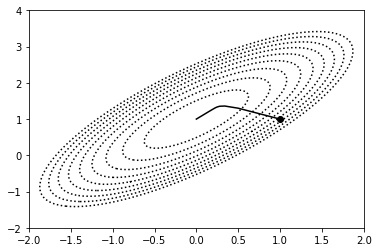

In [11]:
path_x = algo.path_[:, 0] 
path_y = algo.path_[:, 1] 

# 始点と経路の描画
plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(path_x, path_y, color="k", linewidth=1.5)

# 等高線の描画
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 4, 100)
xmesh, ymesh = np.meshgrid(xs, ys)
#xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
xx = np.r_[[xmesh.ravel()], [ymesh.ravel()]]
#print(xx)

levels = np.linspace(-3, 4, 10)
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")

In [12]:
print(len(algo.path_))

159


## ニュートン法

$$
    x_{k+1} = x_k - J_f(x_k)^{-1}f(x_k)
$$

In [13]:
from solver import Newton

### 1次元

$ x^3 -5x + 1 = 0 $

In [14]:
def f(x):
    return x**3 -5*x +1

def df(x):
    return 3*x**2 - 5

[[-2.33005874]]
[[0.20163968]]
[[2.12841906]]


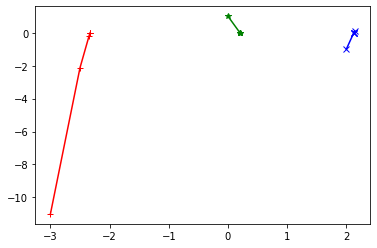

In [31]:
solver = Newton(f, df)
#initials = [-3, 0, 2]
#initials = [np.array([-3]), np.array([0]), np.array([2])]
initials = [np.array([[-3]]), np.array([[0]]), np.array([[2]])]
markers = ["+", "*", "x"]
colors = ["r", "g", "b"]

for x0, mark, color in zip(initials, markers, colors):
    sol = solver.solve(x0)
    path_x = solver.path_[:, 0]
    path_y = f(path_x)
    #path_y = solver.path_[:, 1]
    plt.plot(path_x, path_y, color=color, marker=mark)
    print(sol)
    
plt.show()

### 多次元

$$
    f_1(x, y) = x^3 -2y = 0\\
    f_2(x, y) = x^2 + y^2 - 1 = 0
$$

In [97]:
def f1(x, y):
    return x**3 - 2*y

def f2(x, y):
    return x**2 + y**2 -1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    df1 = [3*x**2, -2]
    df2 = [2*x, 2*y]
    return np.array([df1, df2])

[-0.92071038 -0.39024659]
[0.92071038 0.39024659]
[0.92071038 0.39024659]


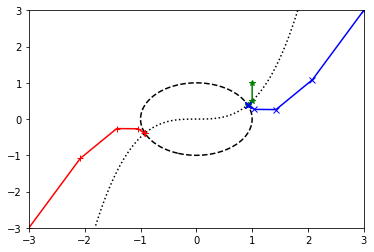

In [98]:
solver = Newton(f, df)
initials = [np.array([-3, -3]), np.array([1, 1]), np.array([3, 3])]
markers = ["+", "*", "x"]
colors = ["r", "g", "b"]

for x0, mark, color in zip(initials, markers, colors):
    sol = solver.solve(x0)
    path_x = solver.path_[:, 0]
    #path_y = f(path_x)
    path_y = solver.path_[:, 1]
    plt.plot(path_x, path_y, color=color, marker=mark)
    print(sol)

# 等高線の描画
xs = np.linspace(-3, 3, 100)
ys = np.linspace(-3, 3, 100)
xmesh, ymesh = np.meshgrid(xs, ys)

z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)

levels = [0]
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.contour(xmesh, ymesh, z1, levels=levels, colors="k", linestyles="dotted")
plt.contour(xmesh, ymesh, z2, levels=levels, colors="k", linestyles="--")
plt.show()

## ラグランジュ未定乗数法

$$
    L(x, y, \lambda) = f(x, y) + \lambda g(x, y) = 0\\
    \nabla{L} = \left(
        \begin{matrix}
            \frac{\partial L}{\partial x}\\
            \frac{\partial L}{\partial y}\\
            \frac{\partial L}{\partial \lambda}\\
        \end{matrix}
    \right) = 0
$$

Minimize $f(x,y) = 5x^2 + 6xy + 5y^2 - 26x - 26y$\
Subject to $g(x, y) = x^2 + y^2 -4 = 0$

$$
    \begin{cases}
        10x + 6y - 26 + 2\lambda{x} = 0\\
        10y + 6x - 26 + 2\lambda{y} = 0\\
        x^2 + y^2 -4 = 0\\
    \end{cases}
$$

In [99]:
def f(X):
    x, y = X
    return 5*x**2 + 6*x*y + 5*y**2 - 26*x - 26*y

def g(X):
    x, y = X
    return x**2 + y**2 - 4

def df(X):
    x, y, L = X
    df_x = 10*x + 6*y - 26 + 2*L*x
    df_y = 10*y + 6*x - 26 + 2*L*y
    df_L = x**2 + y**2 - 4
    return np.array([df_x, df_y, df_L])

In [100]:
from scipy.optimize import fsolve

In [101]:
root = fsolve(df, [1, 1, 1])
x, y = root[0], root[1]
print(root)
print(f([x, y]))

[1.41421356 1.41421356 1.19238816]
-41.53910524340608


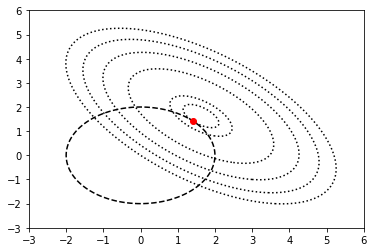

In [105]:
# f(x, y)が最小値となる点をプロット
plt.plot(x, y, color="r", marker="o")

# 等高線の描画
xs = np.linspace(-3, 6, 100)
ys = np.linspace(-3, 6, 100)
xmesh, ymesh = np.meshgrid(xs, ys)

fx = f([xmesh, ymesh])
gx = g([xmesh, ymesh])

levels_f = [-41.5, -40, -30, -20, -10, 0]
levels_g = [0]

plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.contour(xmesh, ymesh, fx, levels=levels_f, colors="k", linestyles="dotted")
plt.contour(xmesh, ymesh, gx, levels=levels_g, colors="k", linestyles="--")
plt.show()